In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Replace 'path_to_your_csv_file' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Trails/NVDA 1.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check if it's loaded correctly
print(data.head())


         Date     Open     High      Low    Close  Adj Close     Volume
0  2012-11-20  0.28950  0.29075  0.28425  0.28725   0.265173  336976000
1  2012-11-21  0.28725  0.29625  0.28700  0.29550   0.272789  422312000
2  2012-11-23  0.29675  0.30100  0.29525  0.29750   0.274636  276932000
3  2012-11-26  0.29800  0.30350  0.29750  0.30275   0.279482  364600000
4  2012-11-27  0.30150  0.30850  0.29900  0.30400   0.280636  451404000


In [ ]:
# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2915 non-null   object 
 1   Open       2915 non-null   float64
 2   High       2915 non-null   float64
 3   Low        2915 non-null   float64
 4   Close      2915 non-null   float64
 5   Adj Close  2915 non-null   float64
 6   Volume     2915 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB
None
              Open         High          Low        Close    Adj Close  \
count  2915.000000  2915.000000  2915.000000  2915.000000  2915.000000   
mean     12.203867    12.424575    11.971037    12.212220    12.184745   
std      19.324402    19.672322    18.933069    19.333715    19.338275   
min       0.287250     0.290750     0.284250     0.287250     0.265173   
25%       0.646500     0.657000     0.633500     0.647125     0.630227   
50%       4.743000   

In [ ]:
# Select only the 'Date' and 'Adj Close' columns
nvidia_data = data[['Date', 'Adj Close']].copy()

# Parse the dates and set the 'Date' column as the index
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])
nvidia_data.set_index('Date', inplace=True)

# Display the first few rows to verify changes
print(nvidia_data.head())

            Adj Close
Date                 
2012-11-20   0.265173
2012-11-21   0.272789
2012-11-23   0.274636
2012-11-26   0.279482
2012-11-27   0.280636


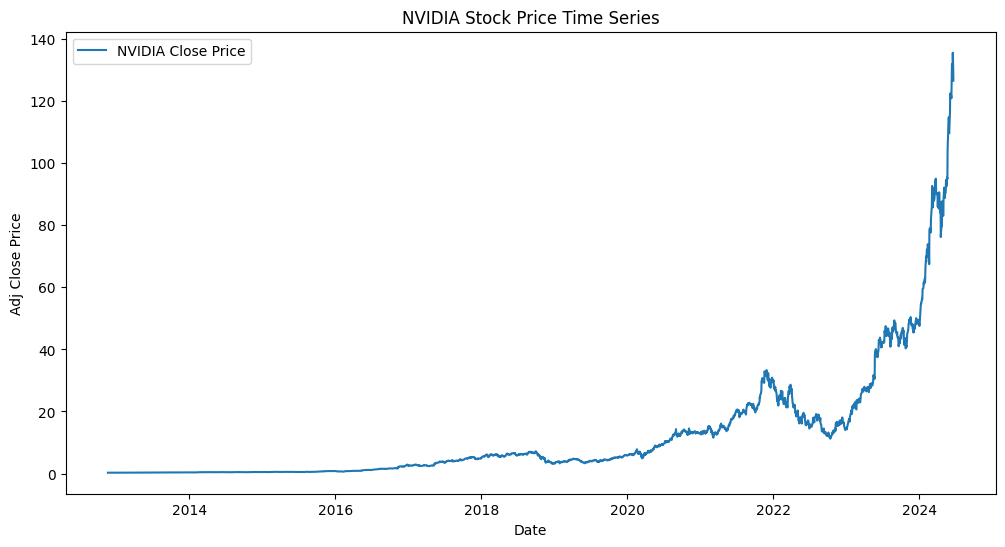

In [ ]:
# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot( nvidia_data['Adj Close'], label='NVIDIA Close Price')
plt.title('NVIDIA Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


In [ ]:
import plotly.express as px

# Create an interactive plot using Plotly
fig = px.line(nvidia_data, x=nvidia_data.index, y='Adj Close', title='NVIDIA Stock Price')

# Customize the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Adj Close Price',
    legend_title_text='Stock Price',
    template='ggplot2'
)

# Show the plot
fig.show()

           Model       Date  Adj Close     Trend  Seasonal  Residual  \
Date                                                                   
2012-11-20   STL 2012-11-20   0.265173  0.254753 -0.027693  0.038113   
2012-11-21   STL 2012-11-21   0.272789  0.255243 -0.020859  0.038404   
2012-11-23   STL 2012-11-23   0.274636  0.255734 -0.023072  0.041974   
2012-11-26   STL 2012-11-26   0.279482  0.256224 -0.013936  0.037194   
2012-11-27   STL 2012-11-27   0.280636  0.256715 -0.006761  0.030682   
2012-11-28   STL 2012-11-28   0.282944  0.257206  0.011585  0.014153   
2012-11-29   STL 2012-11-29   0.277866  0.257697  0.004410  0.015759   
2012-11-30   STL 2012-11-30   0.276251  0.258187  0.019958 -0.001894   
2012-12-03   STL 2012-12-03   0.271174  0.258678  0.027986 -0.015490   
2012-12-04   STL 2012-12-04   0.279251  0.259169  0.024626 -0.004544   

            Seasonally Adjusted  
Date                             
2012-11-20             0.292866  
2012-11-21             0.293648  

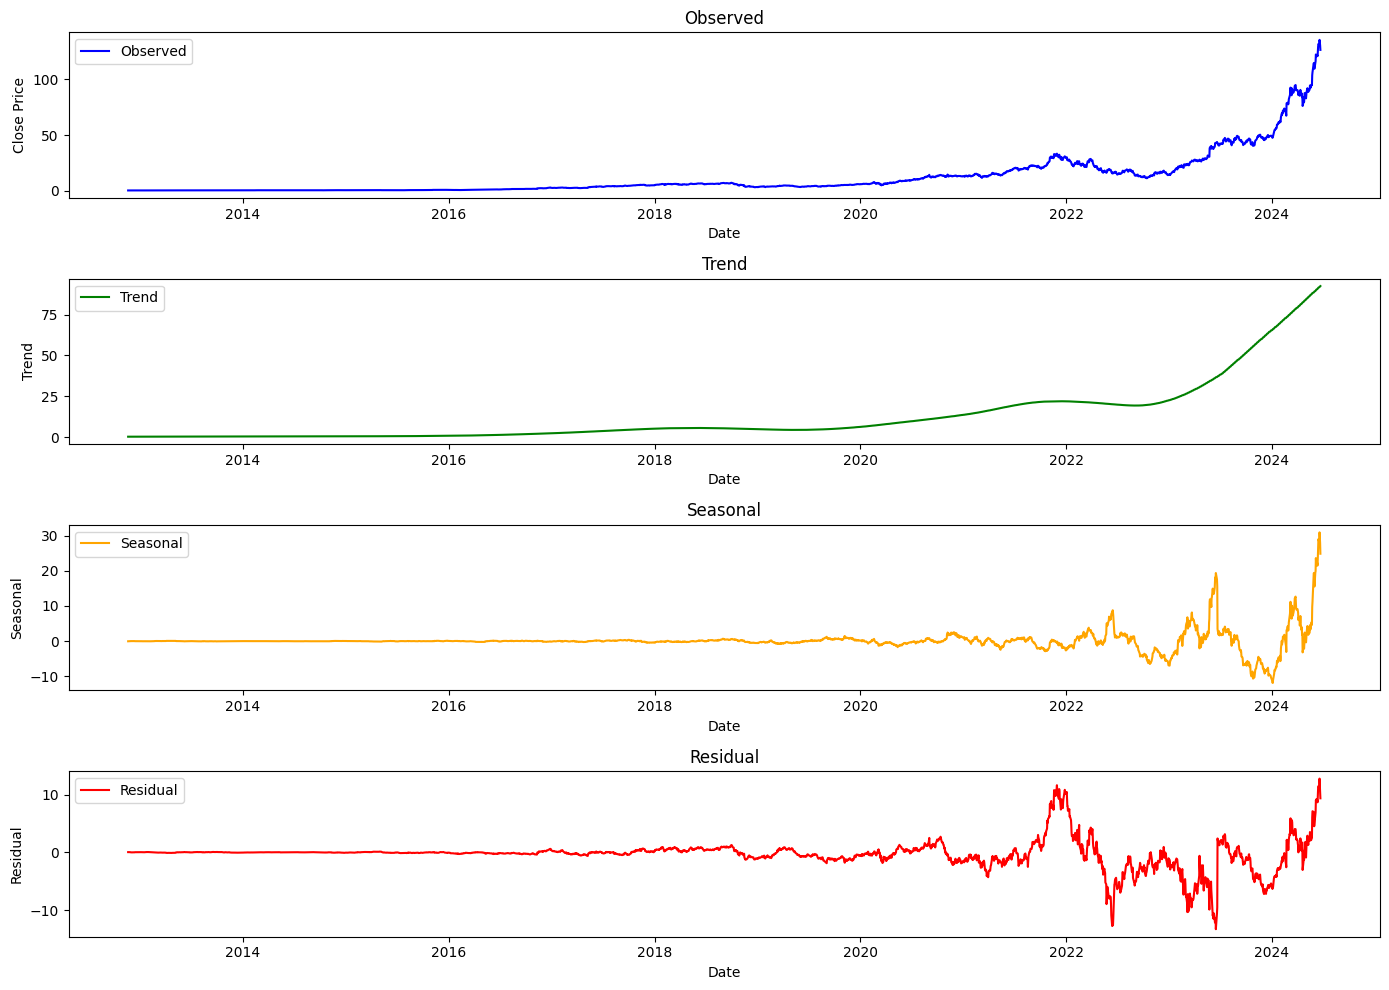

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt


# Set the period for STL decomposition (adjust based on your data)
period = 252  # For yearly seasonality in daily stock data

# Perform STL decomposition
stl = STL(nvidia_data['Adj Close'], period=period)
result = stl.fit()

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid
season_adjust = trend + residual

# Create a DataFrame to hold the components and other relevant columns
components_df = pd.DataFrame({
    'Date': nvidia_data.index,
    'Adj Close': nvidia_data['Adj Close'],
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual,
    'Seasonally Adjusted': season_adjust
})

# Adding a column for the model name
components_df['Model'] = 'STL'

# Rearrange columns to match the desired format
components_df = components_df[['Model', 'Date', 'Adj Close', 'Trend', 'Seasonal', 'Residual', 'Seasonally Adjusted']]

# Print the components DataFrame
print(components_df.head(10))

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(components_df['Date'], components_df['Adj Close'], label='Observed', color='blue')
plt.title('Observed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(components_df['Date'], components_df['Trend'], label='Trend', color='green')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(components_df['Date'], components_df['Seasonal'], label='Seasonal', color='orange')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(components_df['Date'], components_df['Residual'], label='Residual', color='red')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


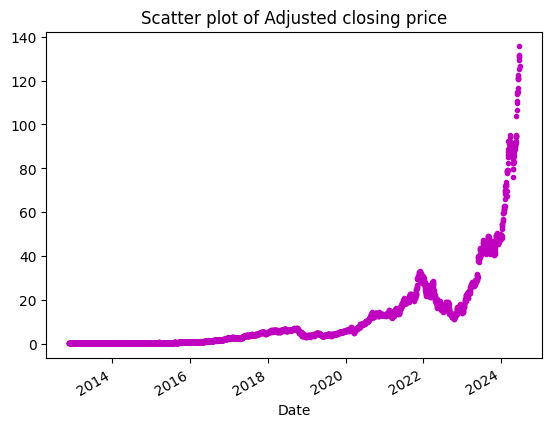

In [ ]:
df_close = nvidia_data['Adj Close']
df_close.plot(style='m.')
plt.title('Scatter plot of Adjusted closing price')
plt.show()

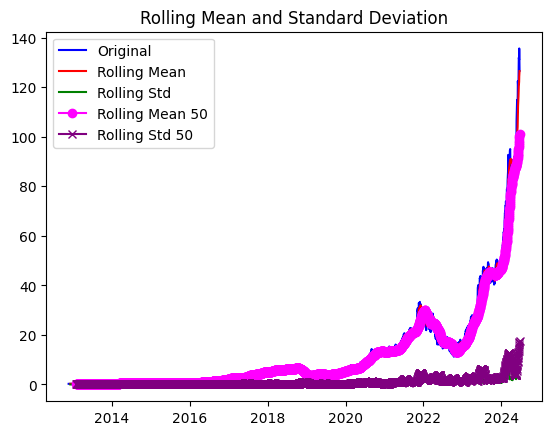

Results of dickey fuller test
Test Statistics                   5.872963
p-value                           1.000000
No. of lags used                 27.000000
Number of observations used    2887.000000
critical value (1%)              -3.432617
critical value (5%)              -2.862542
critical value (10%)             -2.567303
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    rolemean50 = timeseries.rolling(50).mean()
    rolstd50 = timeseries.rolling(50).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.plot(rolemean50, color='magenta', marker='o', label='Rolling Mean 50')
    plt.plot(rolstd50, color='purple', marker='x',label = 'Rolling Std 50')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df_close)

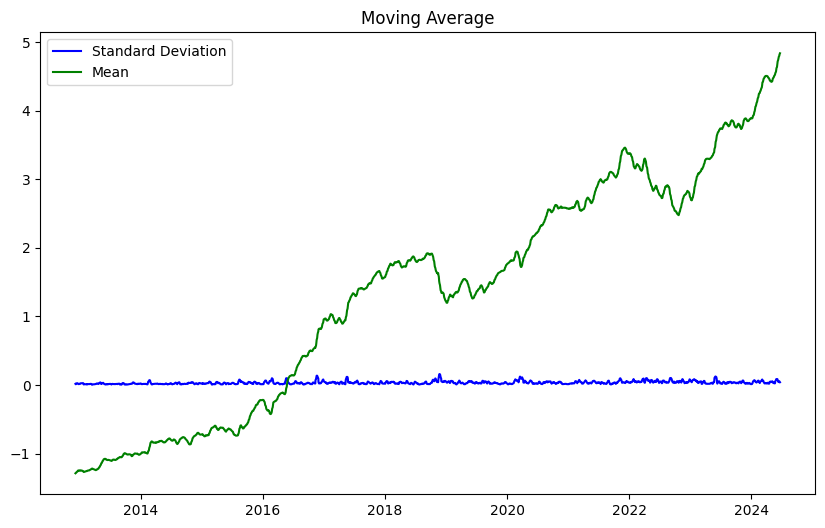

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="blue", label = "Standard Deviation")
plt.plot(moving_avg, color="green", label = "Mean")
plt.legend()
plt.show()

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pycaret.time_series import TSForecastingExperiment


In [ ]:
import pandas as pd

# Load your NVIDIA stock data
nvidia_data = data

# Verify index and columns
print(nvidia_data.index)  # This should print the DateTime index

# Ensure only 'Close' column is included for forecasting
nvidia_data = nvidia_data[['Adj Close']]


RangeIndex(start=0, stop=2915, step=1)


In [ ]:
# Initialize TSForecastingExperiment
exp = TSForecastingExperiment()

# Setup Experiment with cleaned_data
exp.setup(data=nvidia_data, session_id=123, fh=100, fold_strategy='sliding', fold=10)

# Compare Models, Create Model, Finalize Model, and Forecasting steps as before


,Description,Value
0,session_id,123
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(2915, 1)"
5,Transformed data shape,"(2915, 1)"
6,Transformed train set shape,"(2815, 1)"
7,Transformed test set shape,"(100, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


In [ ]:
exp.plot_model()

In [ ]:
exp.plot_model(plot="acf")

In [ ]:
exp.plot_model(
    plot="pacf",
    data_kwargs={'nlags':30},
    fig_kwargs={'fig_size': [800, 500], 'template': 'simple_white'}
)

In [ ]:
exp.plot_model(plot="periodogram")

In [ ]:
exp.plot_model(plot="fft")

In [ ]:
exp.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

In [ ]:
exp.plot_model(plot="decomp")

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


In [ ]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,2915.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,12.184745
3,Summary,Statistics,Transformed,Median,,4.698981
4,Summary,Statistics,Transformed,Standard Deviation,,19.338275
5,Summary,Statistics,Transformed,Variance,,373.96889
6,Summary,Statistics,Transformed,Kurtosis,,10.32273
7,Summary,Statistics,Transformed,Skewness,,2.95705
8,Summary,Statistics,Transformed,# Distinct Values,,2767.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",59214.83499
